In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
global df
global alpha
global theta
global X
global y
global lmbda
global delta
global train
global test

In [3]:
#Function to import data

def import_data():
    global df
    
    df = pd.read_excel('C:\\Users\\asus\\Desktop\\LR.xlsx')
    df.dropna(inplace=True)
    return

In [4]:
#Function to standardize input features

def stand_norm():
    global df
    
    backup = df
    resp = df['MDV']
    df.drop(['MDV'], axis=1, inplace=True)
    
    cols = list(df)
    
    stats = df.describe()
    for col in cols:
        def func(x):
            return (x-stats[col][1])/stats[col][2]

        df[col] = df[col].apply(func)
    df['MDV'] = resp
    return

In [5]:
#Function to create 2nd degree polynomial features as L2-Regularization isn't really useful with a few number of features.

def feature_map():
    global df
    
    cols = list(df)
    
    backup = df
    resp = df['MDV']
    df.drop(['MDV'], axis=1, inplace=True)

    nums = range(0,12)
    for i in range(0,18):
        first = random.choice(nums)
        second = random.choice(nums)
        name = cols[first] + "x" + cols[second]
        df[name] = df[cols[first]].multiply(df[cols[second]], axis=0)

    df['MDV'] = resp
    return

In [6]:
#Function to compute J_theta (or the cost function)

def costFunc(X,y,theta,length):
    global lmbda
    
    sq_diff = np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y))**2)
    cost = (1/(2*(length))) * (sq_diff + (lmbda * np.sum(theta[1:]**2)))
    return cost

In [7]:
#Function to run batch gradient descent algorithm to optimize the cost fuction of the problem.

def gradientDesc(X,y,train,lmbda,alpha,n_iter):
    global theta
    
    costs = list()
    for i in range(0, n_iter):
        theta[0] = theta[0] - (alpha/len(train)) * np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y)))
        for j in range(1,len(theta)):
            theta[j] = theta[j]*(1 - (alpha/len(train))) - (alpha/len(train)) * (np.sum((np.sum(np.array(X) * theta, axis=1) - np.array(y)) * np.array(X.ix[:,j])))
        costs.append(costFunc(X, y, theta, len(train)))
    return costs

In [8]:
def main():
    global alpha
    global df
    global theta
    global X
    global y
    global lmbda
    global delta
    global train
    global test
    
    lmbda = 5
    alpha = 1
    n_iter = 50
    
    #To import, standardize and map features to achieve final data set.
    import_data()
    stand_norm()
    feature_map()
    
    
    df = df.iloc[np.random.permutation(len(df)-1)].reset_index(drop=1) # To shuffle the dataset
    train_size = int(round(len(df) * 0.75)) # Training set size: 75% of full data set.
    train = df[:train_size]
    test = df[train_size:]
    
    Xn    = pd.Series([1] * len(train)) # Creation feature X_0 which is to hold a value of 1.
    X     = pd.concat([Xn, train.drop(['MDV'], axis=1)], axis=1) #Feature set in X
    y     = train['MDV'] #Response variable in y
    theta = [0] * (len(list(X))) #Theta or parameter vector initialized with 1
    theta = np.array(theta)
    
    #To train on train data set
    costs = gradientDesc(X,y,train,lmbda,alpha,n_iter)
    
    Xn    = pd.Series([1] * len(test))
    test.reset_index(drop=1, inplace=True)
    test_x = pd.concat([Xn, test.drop('MDV',axis=1)], axis=1)
    test_y = test['MDV']
    
    #To test model on test set
    predictions = test_x * theta
    residuals = np.sum(np.array(test_x) * theta, axis=1) - test_y
    cost = sum(residuals)/len(residuals)
    
    #Normal Equation method comparison
    #theta_num  = np.dot(np.dot((np.linalg.inv(np.dot(np.matrix.transpose(np.array(X)),np.array(X)))), np.matrix.transpose(np.array(X))), np.array(y))
    #cost = costFunc(X,y,theta_num)
    
    print 'Mean Absolute Percentage Error of model on Test set:',abs(cost),'%'
    plt.plot(costs)
    plt.title('J_Theta(For Training) vs Number of iterations')
    plt.ylabel('J_Theta(Cost)')
    plt.xlabel('Number of Iterations')
    #plt.show()
    

Mean Absolute Percentage Error of model on Test set: 0.263355443693 %


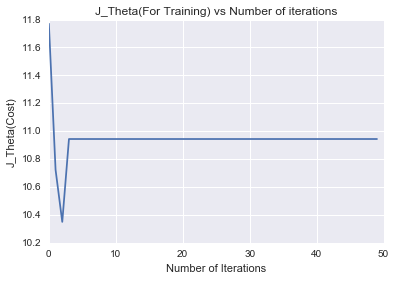

In [9]:
if __name__ == '__main__':
    main()

In [10]:
#Now we use the built-in ridge regression module in sci-kit learn on our data set to compare performance with the one we built above.

from sklearn.linear_model import Ridge

In [11]:
clf = Ridge(alpha=5, solver='sag', max_iter=10) #We use the stochastic averaged gradient descent algorihtm since batch GD isn't available
model = clf.fit(X, y)

Xn    = pd.Series([1] * len(test))
test.reset_index(drop=1, inplace=True)
test_x = pd.concat([Xn, test.drop('MDV',axis=1)], axis=1)
test_y = test['MDV']

pred = model.predict(test_x)
residuals = pred - test_y
cost = sum(residuals)/len(residuals)
print 'Mean Absolute Percentage Error of built-in model on test set:',abs(cost),'%'

Mean Absolute Percentage Error of built-in model on test set: 0.147525011733 %


D:\Users\asus\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We see that the performance of both the models are fairly similar, and therefore conclude that our implementation is correct, if not better than the built-in module.